In [84]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [37]:
import 

In [38]:
pre = PreProcessor()
pre.setPara('')

pre.transVector()
pre.Vec

[array([ 2.24770550e-02, -7.96812624e-02, -2.03552712e-02,  1.86602861e-01,
         1.31304726e-01,  8.78325850e-02, -1.47202294e-02, -5.38722798e-02,
         6.33157417e-02,  1.10520739e-02,  1.51493445e-01,  1.83012620e-01,
         1.65917158e-01,  1.16640097e-02,  2.53683161e-02, -3.49536598e-01,
         8.05003792e-02, -4.12851535e-02,  1.33538321e-01, -1.01958752e-01,
         9.89325866e-02, -1.80083066e-02, -1.85750395e-01,  3.66972038e-03,
        -2.10383572e-02,  2.23525673e-01, -1.26911968e-01,  8.18286985e-02,
         9.72807333e-02,  9.95129496e-02, -5.53676262e-02, -5.58397025e-02,
         9.63059887e-02, -1.82411879e-01, -1.56122223e-01, -6.31740838e-02,
         1.23284683e-02,  1.59240246e-01, -1.06038161e-01, -4.46947254e-02,
        -1.37210682e-01,  4.04272377e-02,  1.70104384e-01,  1.64767671e-02,
        -1.18752457e-01,  2.87958384e-02,  2.12361403e-02,  9.76089239e-02,
         2.65155703e-01, -4.54164948e-03, -2.60170430e-01, -1.91105157e-02,
         5.6

In [85]:

df = pd.DataFrame(columns=['height', 'weight'])
df.loc[0] = [185,60]
df.loc[1] = [180,60]
df.loc[2] = [185,70]
df.loc[3] = [165,63]
df.loc[4] = [155,68]
df.loc[5] = [170,75]
df.loc[6] = [185,65]

df2 = pd.DataFrame(columns=['height', 'weight'])
df2.loc[0] = [185,75]
df2.loc[1] = [175,63]
df2.loc[2] = [165,60]
df2.loc[3] = [170,66]



In [86]:

df.head(7)

,height,weight
0,185,60
1,180,60
2,185,70
3,165,63
4,155,68
5,170,75
6,185,65


In [89]:
len(df)

7

In [90]:
df3 = df.append(df2,ignore_index=True)
df3

,height,weight
0,185,60
1,180,60
2,185,70
3,165,63
4,155,68
5,170,75
6,185,65
7,185,75
8,175,63
9,165,60


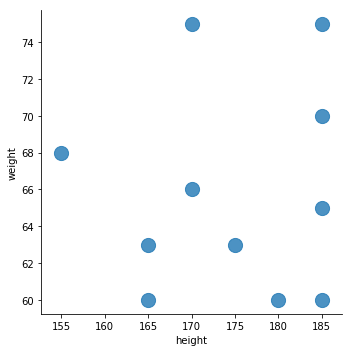

In [91]:
sns.lmplot('height', 'weight', 
           data=df3, fit_reg=False, 
           scatter_kws={"s": 200})

In [93]:

data_points = df3.values
kmeans = KMeans(n_clusters=4).fit(data_points)


In [95]:
df3.values

array([[185, 60],
       [180, 60],
       [185, 70],
       [165, 63],
       [155, 68],
       [170, 75],
       [185, 65],
       [185, 75],
       [175, 63],
       [165, 60],
       [170, 66]], dtype=object)

In [97]:
kmeans.cluster_centers_

array([[183.33333333,  61.66666667],
       [161.66666667,  63.66666667],
       [171.66666667,  68.        ],
       [185.        ,  72.5       ]])

In [99]:
df3['cluster_id'] = kmeans.labels_

In [100]:
df3.head(12)


,height,weight,cluster_id
0,185,60,0
1,180,60,0
2,185,70,3
3,165,63,1
4,155,68,1
5,170,75,2
6,185,65,0
7,185,75,3
8,175,63,2
9,165,60,1


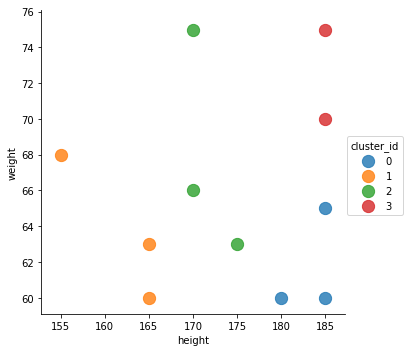

In [102]:

sns.lmplot('height', 'weight', data=df3, fit_reg=False,
           scatter_kws={"s": 150},
           hue="cluster_id")

In [129]:
# cluster id와 target id가 동일한 경우 하나의 클러스터로 통합. 
df4= df3[len(df):]
eq_cluster = list(set(df4['cluster_id'].values))
eq_cluster[:]

[1, 2, 3]

In [141]:
for i in range(len(eq_cluster)):
    df3.loc[df3['cluster_id']==eq_cluster[i],"cluster_id"] = 5

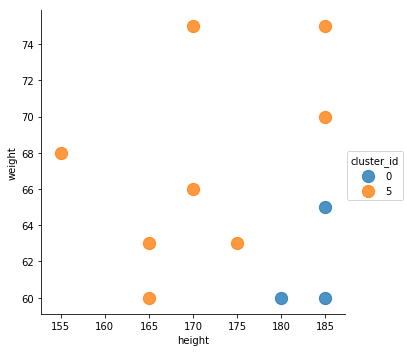

In [143]:

sns.lmplot('height', 'weight', data=df3, fit_reg=False,
           scatter_kws={"s": 150},
           hue="cluster_id")